In [22]:
import numpy as np
import pandas as pd
import numpy.matlib
import random
import matplotlib.pyplot as plt
import seaborn as sns

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [23]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X_train = trainX.reshape(trainX.shape[0],28*28)
X_test = testX.reshape(testX.shape[0],28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
def show_img(img):
  img = img.reshape((28,28))
  plt.imshow(img, cmap='gray')
  plt.show()

In [25]:
m = X_train.shape[0]
n = X_train.shape[1]
print("training examples: ", m, " and number of features in each sample: ", n)

training examples:  60000  and number of features in each sample:  784


In [26]:
k = 10

In [27]:
centroids = np.array([]).reshape(n, 0)

In [28]:
centroids

array([], shape=(784, 0), dtype=float64)

In [29]:
import random as rd
for i in range(k):
    rand=rd.randint(0,m-1)
    centroids=np.c_[centroids,X_train[rand]]

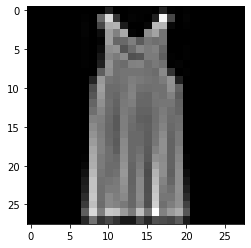

In [30]:
plt.imshow(centroids[:,0].reshape((28,28)),cmap='gray')
plt.show()

In [31]:
Output = {}
def obtain_elucid_dist(X_train, centroids):
  euclidean_distance = np.array([]).reshape(X_train.shape[0], 0)
  k = 10
  for K in range(k):
    tmp = np.sum((X_train - centroids[:,K])**2, axis = 1)
    euclidean_distance = np.c_[euclidean_distance, tmp]
  c = np.argmin(euclidean_distance, axis=1) + 1

  return c

c = obtain_elucid_dist(X_train, centroids)

In [37]:
#Mine

kclusters = 10
tolerance = 0.01
max_iter = 50
init_cluster = 'random'
dmeasure = 'euclidean'

def initialization(train):
    if(init_cluster == 'forgy'):
        centroids = []
        for i in range(kclusters):
            index = random.randint(0, len(train)-1)
            centroids.append(train[index])
    elif(init_cluster == 'random'):
        index = np.array(random.choices(range(0, kclusters), k=train.shape[0]))
        mean = []
        for count in range(kclusters):
            mean.append(train[index == count].mean(axis=0))
        centroids = [element[ None, :] for element in mean]

def distance_measure(train):
    if(dmeasure == 'euclidean'):
        for features in train:
            distances = [np.linalg.norm(features - centroids[k]) for k in range(self.kclusters)]
            label = distances.index(min(distances))
            clusters[label].append(features)
    elif(dmeasure == 'manhattan'):
        for features in train:
            distances = [np.sum(np.abs(features - centroids[k])) for k in range(self.kclusters)]
            label = distances.index(min(distances))
            clusters[label].append(features)        

def fit(train):
    initial_cluster(train)
    
    for i in range(max_iter):
        var = 1
        clusters = {}
        for i in range(kclusters):
            clusters[i] = []
        
        distance_measure(train)
        old_clusters = centroids

        for label in clusters:
            centroids[label] = np.average(self.clusters[label], axis = 0)

        for i in range(len(centroids)):
            previous = old_clusters[i]
            current = centroids[i]
            if np.sum((current - previous)/(previous+0.0001) * 100.0) > tolerance:
                var = 0


def pred(test):
    clusters = []
    for features in test:
        if dmeasure == 'euclidean':
            distances = [np.linalg.norm(features - centroids[k]) for k in range(self.kclusters)]
        if dmeasure == 'manhattan':
            distances = [np.sum(np.abs(features - centroids[k])) for k in range(kclusters)]
    
        clusters.append(distances.index(min(distances)))
    return clusters      
        

def update(train):
    cost_update = 0
    for i in range(kclusters):
        cost_update += np.linalg.norm(clusters[i] - centroids[i])
    return cost_update/kclusters

In [33]:
#implement elbow method from scratch
def elbow(list_k, method):
  kmeans = []
  for k in list_k:
      initialization(X_train)
      distance_measure(X_train)
      fit(X_train)
      pred(X_train)
      update(X_train)
      model = Kmeans(k=k)
      model.fit(X_train)
      kmeans.append(model.cost_update())
      
  return kmeans

In [35]:
list_k = [3]
cost = elbow(list_k, 'Kmeans')

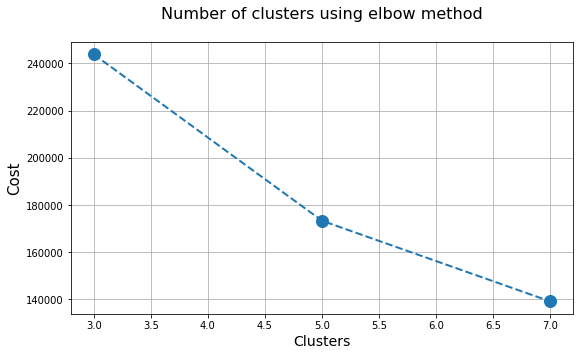

In [7]:
plt.figure(figsize=(9,5))
plt.title("Number of clusters using elbow method\n",fontsize=16)
plt.plot(list_k, cost, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
plt.xlabel("Clusters",fontsize=14)
plt.ylabel("Cost",fontsize=15)
# plt.xticks(list_k,fontsize=14)
# plt.yticks(fontsize=15)
plt.show()

In [ ]:
#Reference for Silhouette - https://gist.github.com/AlexandreAbraham/5544803
import time


def nearest(centroid, centroids, k__):
    dist = [np.linalg.norm(centroids[k] - centroid) for k in range(k__) 
    if np.linalg.norm(centroids[k] - centroid) != 0.0]
    return min(dist)

def mean_intra(clusters, centroid):
    dist = [np.linalg.norm(clusters[i] - centroid) for i in range(len(clusters)) 
    if np.linalg.norm(clusters[i] - centroid) != 0.0]
    return sum(dist)/len(dist)


In [ ]:
#implement silhouette method from scratch
def silhouette(list_k, method):
    value = []
    for k in list_k:
        start = time.time()
        if method == 'Kmeans':
            model = Kmeans(k=k)
        
        
        
        model.fit(X_train)
        cost = 0
        for i in range(k):
            X = mean_intra(model.clusters[i], model.centroids[i])
            Y = nearest(model.centroids[i], model.centroids, k)
            temp = (Y - X)/max(X, Y)
            cost += temp
        value.append(cost/k)
        end = time.time()
        print(f"for {k} clusters, time taken = {(end-start)} seconds")

    return value

In [ ]:
list_k = [3, 5, 7]
cost = elbow(list_k, 'Kmeans')

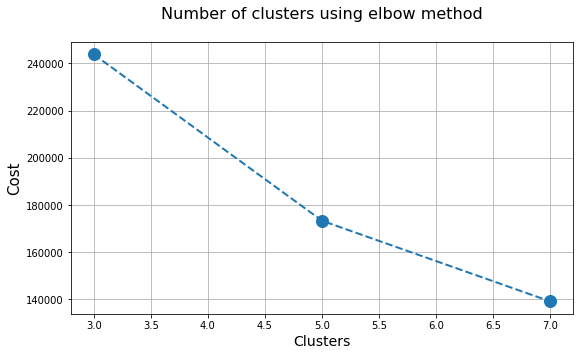

In [ ]:
plt.figure(figsize=(9,5))
plt.title("Number of clusters using elbow method\n",fontsize=16)
plt.plot(list_k, cost, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
plt.xlabel("Clusters",fontsize=14)
plt.ylabel("Cost",fontsize=15)
# plt.xticks(list_k,fontsize=14)
# plt.yticks(fontsize=15)
plt.show()

In [ ]:
import time


def nearest(centroid, centroids, k__):
    dist = [np.linalg.norm(centroids[k] - centroid) for k in range(k__) 
    if np.linalg.norm(centroids[k] - centroid) != 0.0]
    return min(dist)

def mean_intra(clusters, centroid):
    dist = [np.linalg.norm(clusters[i] - centroid) for i in range(len(clusters)) 
    if np.linalg.norm(clusters[i] - centroid) != 0.0]
    return sum(dist)/len(dist)

#Reference for Silhouette - https://gist.github.com/AlexandreAbraham/5544803

In [ ]:
list_k = [3, 5, 7]
kmean = silhouette(list_k, 'Kmeans')

for 3 clusters, time taken = 109.09672355651855 seconds
for 5 clusters, time taken = 166.5855941772461 seconds
for 7 clusters, time taken = 230.24317908287048 seconds


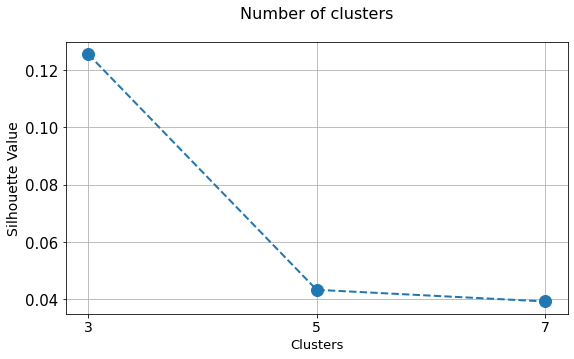

In [ ]:
plt.figure(figsize=(9,5))
plt.title("Number of clusters\n",fontsize=16)
plt.plot(list_k, kmean, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
plt.xlabel("Clusters",fontsize=13)
plt.ylabel("Silhouette Value",fontsize=14)
plt.xticks(list_k,fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

model = Kmeans()
model.fit(X_train)
preds = model.prediction(X_train)

pred = np.asarray(preds, dtype=np.uint8)
homogeneity_score(trainy, pred)

0.5007347127061965

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(trainy, pred))

              precision    recall  f1-score   support

           0       0.02      0.03      0.02      6000
           1       0.00      0.00      0.00      6000
           2       0.02      0.02      0.02      6000
           3       0.00      0.00      0.00      6000
           4       0.01      0.00      0.01      6000
           5       0.48      0.63      0.55      6000
           6       0.00      0.00      0.00      6000
           7       0.00      0.00      0.00      6000
           8       0.03      0.03      0.03      6000
           9       0.90      0.44      0.59      6000

    accuracy                           0.11     60000
   macro avg       0.15      0.11      0.12     60000
weighted avg       0.15      0.11      0.12     60000



In [ ]:
preds = model.prediction(X_test)
pred = np.asarray(preds, dtype=np.uint8)
print(classification_report(testy, pred))

              precision    recall  f1-score   support

           0       0.02      0.03      0.03      1000
           1       0.00      0.00      0.00      1000
           2       0.02      0.02      0.02      1000
           3       0.00      0.00      0.00      1000
           4       0.01      0.01      0.01      1000
           5       0.52      0.65      0.58      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.03      0.03      0.03      1000
           9       0.90      0.41      0.56      1000

    accuracy                           0.11     10000
   macro avg       0.15      0.11      0.12     10000
weighted avg       0.15      0.11      0.12     10000



In [ ]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 4.950s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 454.347646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.502228
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

In [ ]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': preds}

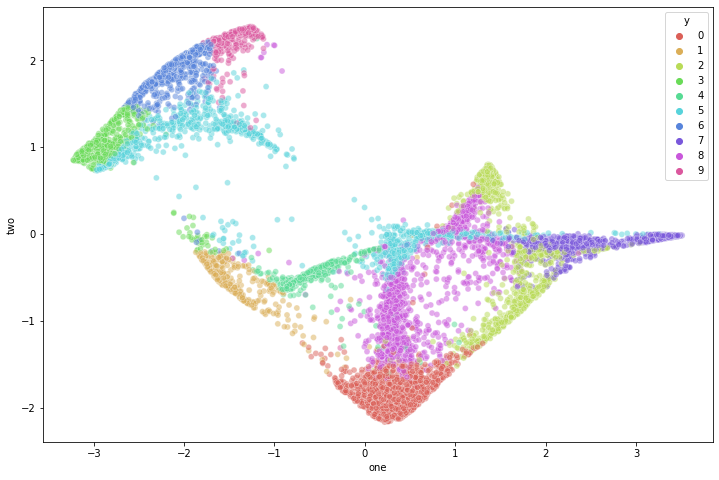

In [ ]:
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=test,
    legend="full",
    alpha=0.5
)

Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [ ]:
x_train = X_train[:20000,:]
x_test = X_test[:20000,:]
y_train = trainy[:20000]
y_test = testy[:20000]

In [ ]:
# # implement hierarchical clustering ( you can use scikit module)

def labels_clusters(hclust, true_labels,n_clusters):
    infer_labels = {}

    for i in range(n_clusters):

        labels = []
        index = np.where(hclust.labels_ == i)
        labels.append(true_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in infer_labels:
            infer_labels[np.argmax(counts)].append(i)
        else:
            infer_labels[np.argmax(counts)] = [i]
        
    return infer_labels  

def data_labels_cluster(hc_pred, labeled_clusters):
    predicted_y = np.zeros(len(hc_pred)).astype(np.uint8)
    
    for i, cluster in enumerate(hc_pred):
        for key, value in labeled_clusters.items():
            if cluster in value:
                predicted_y[i] = key
                
    return predicted_y


In [ ]:
#visualize a dendogram
def dendogram(data,linkage_method):
    plt.figure(figsize=(22,10))
    # dendrogram(linkage(data,method = linkage_method))
    dendrogram(linkage(data,method = linkage_method),
                                     orientation='top',
                                     truncate_mode = 'lastp')

In [ ]:
n_clusters=31
hclust_single = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='single')  
hclust_single.fit(x_train) 
labeled_clusters = labels_clusters(hclust_single, y_train,n_clusters)
predy = hclust_single.fit_predict(x_train)
pred_y_single = data_labels_cluster(predy, labeled_clusters)
print(pred_y_single[:20])
print(trainy[:20])
print(accuracy_score(pred_y_single,y_train))

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
0.10485


In [ ]:
#visualisation of clusters using single linkage and complete linkage

n_clusters=31
hclust_complete = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='complete')  
hclust_complete.fit(x_train) 
labeled_clusters = labels_clusters(hclust_complete, y_train,n_clusters)
predy = hclust_complete.fit_predict(x_train)
pred_y_complete = data_labels_cluster(predy, labeled_clusters)
print(pred_y_complete[:20])
print(trainy[:20])
print(accuracy_score(pred_y_complete,y_train))

[9 0 1 1 1 2 7 2 5 5 0 9 7 7 7 9 3 0 2 2]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
0.5326


In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.016s...
[t-SNE] Computed neighbors for 20000 samples in 26.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

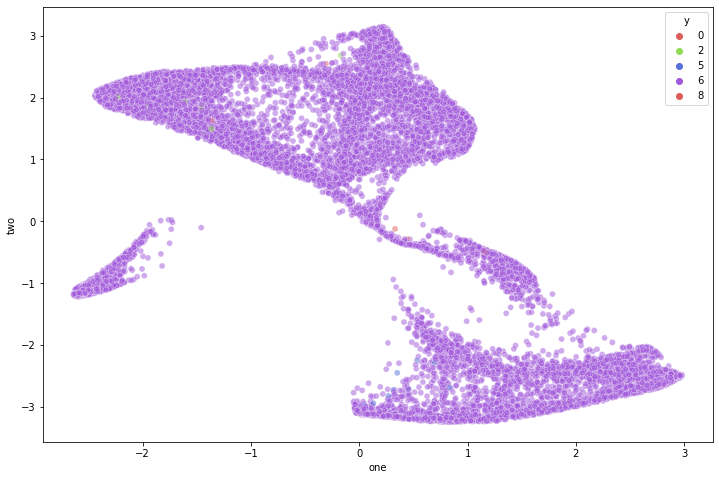

In [ ]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': pred_y_single}
          
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
    palette=sns.color_palette("hls",  as_cmap = True),
    data=test,
    legend="full",
    alpha=0.5
)  

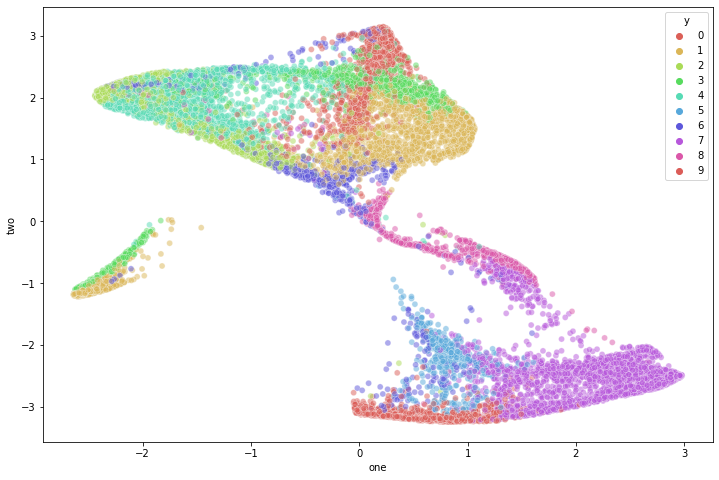

In [ ]:
test = {'one': tsne_results[:,0],  
           'two': tsne_results[:,1],
           'y': pred_y_complete}
          
test = pd.DataFrame(test)

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="one", y="two",
    hue="y",
    palette=sns.color_palette("hls",  as_cmap = True),
    data=test,
    legend="full",
    alpha=0.5
)           

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: If two clusters are merged, the dendrogram will provide height of the join will be the distance between those clusters and will join them in a graph.
It is a basically tree-like structure that represents the hierarchical clustering sequences of merges or splits. When two clusters merge, the dendrogram records the distance between them and displays it in graph form. These are connected, and the height represents the distance between the locations. This is done at each phase where the clusters combine. As a result, we get the dendrogram illustrated below. We now establish a threshold and construct a horizontal line along it using this dendrogram. In general, we consider this barrier to be the line that cuts the highest vertical line. As a result, the number of clusters to be considered will be the intersections of the horizontal line with the threshold.

**Question:** Mention the differences observed using single and complete linkage:

Answer: The error observed in single linkage is more than that of complete linkage.
</br>

In [32]:
#1)https://www.kaggle.com/achintyatripathi/kmeans-from-scratch-with-silhoutte-and-elbow-curve/notebook
#2)https://medium.com/analytics-vidhya/comparison-of-initialization-strategies-for-k-means-d5ddd8b0350e
#3)https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

class Kmeans:
    def __init__(self, k=10, tol=0.01, max_iter=50, init_cluster='random', dmeasure='euclidean'):
        self.kclusters = k
        self.tolerance = tol
        self.max_iter = max_iter
        self.init_cluster = init_cluster
        self.dmeasure = dmeasure
    
    def initial_cluster(self,train):
        if(self.init_cluster == 'forgy'):
            self.centroids = []
            for i in range(self.kclusters):
                index = random.randint(0, len(train)-1)
                self.centroids.append(train[index])
        elif(self.init_cluster == 'random'):
            index = np.array(random.choices(range(0, self.kclusters), k=train.shape[0]))
            mean = []
            for count in range(self.kclusters):
                mean.append(train[index == count].mean(axis=0))
            self.centroids = [element[ None, :] for element in mean]
    
    def distance_measure(self,train):
        if(self.dmeasure == 'euclidean'):
            for features in train:
                distances = [np.linalg.norm(features - self.centroids[k]) for k in range(self.kclusters)]
                label = distances.index(min(distances))
                self.clusters[label].append(features)
        elif(self.dmeasure == 'manhattan'):
            for features in train:
                distances = [np.sum(np.abs(features - self.centroids[k])) for k in range(self.kclusters)]
                label = distances.index(min(distances))
                self.clusters[label].append(features)        
    
    def fit(self, train):
        self.initial_cluster(train)
        
        for i in range(self.max_iter):
            var = 1
            self.clusters = {}
            for i in range(self.kclusters):
                self.clusters[i] = []
            
            self.distance_measure(train)
            old_clusters = self.centroids

            for label in self.clusters:
                self.centroids[label] = np.average(self.clusters[label], axis = 0)
  
            for i in range(len(self.centroids)):
                previous = old_clusters[i]
                current = self.centroids[i]
                if np.sum((current - previous)/(previous+0.0001) * 100.0) > self.tolerance:
                    var = 0


    def prediction(self, test):
        clusters = []
        for features in test:
            if self.dmeasure == 'euclidean':
                distances = [np.linalg.norm(features - self.centroids[k]) for k in range(self.kclusters)]
            if self.dmeasure == 'manhattan':
                distances = [np.sum(np.abs(features - self.centroids[k])) for k in range(self.kclusters)]
        
            clusters.append(distances.index(min(distances)))
        return clusters      
            

    def cost_update(self):
        cost_update = 0
        for i in range(self.kclusters):
            cost_update += np.linalg.norm(self.clusters[i] - self.centroids[i])
        return cost_update/self.kclusters
                
    